In [ ]:
import os 
os.chdir("/content/drive/MyDrive//금융데이터 공모전")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


##설치후 코랩의 런타임 재시작

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
df1=pd.read_excel("/content/drive/MyDrive/금융데이터 공모전/신한은행 개인 금융자산 데이터/finance_data201903.xlsx")

In [ ]:
df2=pd.read_excel("/content/drive/MyDrive/금융데이터 공모전/신한은행 개인 금융자산 데이터/finance_data201909.xlsx")

In [ ]:
df3=pd.read_excel("/content/drive/MyDrive/금융데이터 공모전/신한은행 개인 금융자산 데이터/finance_data202003.xlsx")

In [ ]:
df4=pd.read_excel("/content/drive/MyDrive/금융데이터 공모전/신한은행 개인 금융자산 데이터/finance_data202009.xlsx")

In [ ]:
df5=pd.read_excel("/content/drive/MyDrive/금융데이터 공모전/신한은행 개인 금융자산 데이터/finance_data202103.xlsx")

In [ ]:
df=pd.concat([df1, df2, df3,df4, df5])
df.to_csv("/content/drive/MyDrive//금융데이터 공모전/신한은행데이터통합.csv")

In [ ]:
df = df.replace(0, np.NaN)

In [ ]:
df

,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,역삼동,1123064010001,2,1,NaN,NaN,NaN,NaN,2018319.0,2430312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201903,강남구,11680101,역삼동,1123064010001,2,2,NaN,NaN,NaN,NaN,2326837.0,2221251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201903,강남구,11680101,역삼동,1123064010001,3,1,NaN,NaN,NaN,NaN,1771639.0,1382057.0,1841250.0,NaN,NaN,NaN,NaN,NaN,NaN
3,201903,강남구,11680101,역삼동,1123064010001,3,2,NaN,NaN,NaN,NaN,1745601.0,2902578.0,3561440.0,NaN,NaN,NaN,NaN,NaN,NaN
4,201903,강남구,11680101,역삼동,1123064010001,4,1,NaN,NaN,NaN,NaN,1712433.0,1746992.0,8831666.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211881,202103,중랑구,11260106,신내동,1107070010802,5,2,NaN,NaN,NaN,NaN,1425069.0,4369530.0,9185200.0,NaN,NaN,NaN,NaN,NaN,NaN
211882,202103,중랑구,11260106,신내동,1107070010802,6,1,NaN,NaN,NaN,738450.0,2015000.0,6877740.0,2478000.0,NaN,NaN,NaN,NaN,NaN,NaN
211883,202103,중랑구,11260106,신내동,1107070010802,6,2,NaN,NaN,NaN,595480.0,1495569.0,9297919.0,19789456.0,NaN,NaN,NaN,NaN,NaN,NaN
211884,202103,중랑구,11260106,신내동,1107070010802,7,1,NaN,NaN,NaN,409938.0,812073.0,5018284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
edf=df.loc[:,['지역구', '법정동','총소비금액']]

In [ ]:
edf=edf.dropna()


In [ ]:
regionAvgConsump = edf['총소비금액'].groupby([edf['지역구'],edf['법정동']]).mean()

In [ ]:
regionAvgConsump

지역구  법정동
강남구  개포동    1.727104e+06
     논현동    1.976218e+06
     대치동    2.045939e+06
     도곡동    2.171995e+06
     삼성동    2.130491e+06
                ...     
중랑구  면목동    1.417697e+06
     묵동     1.452866e+06
     상봉동    1.469808e+06
     신내동    1.400826e+06
     중화동    1.376039e+06
Name: 총소비금액, Length: 440, dtype: float64

In [ ]:
rank_regionAvgConsump=pd.DataFrame(regionAvgConsump.rank(ascending=False).astype(int))
rank_regionAvgConsump
rank_regionAvgConsump.sort_values(by='총소비금액')

총소비금액
지역구 법정동          
중구  수하동         1
    인현동1가       2
종로구 소격동         3
중구  필동1가        4
종로구 운니동         5
...           ...
성북구 동소문동3가    436
중구  저동1가      437
    남산동1가     438
    남산동3가     439
    수표동       440

[440 rows x 1 columns]

In [ ]:
regionAvgConsump=pd.DataFrame(regionAvgConsump)

In [ ]:
regionAvgConsump.to_csv("regionAvgConsump.csv")

In [ ]:
bbb=pd.read_csv("regionAvgConsump.csv")

In [ ]:
regionAvgConsump=bbb.iloc[:,1:3]

In [ ]:
regionAvgConsump10 = regionAvgConsump.sort_values(by='총소비금액',ascending=False)

In [ ]:
regionAvgConsump10.iloc[:10,:]  ##주로 회사 있는 지역이 상위권으로 나타내어짐

,법정동,총소비금액
395,수하동,3.401130e+06
409,인현동1가,3.341252e+06
326,소격동,2.651209e+06
427,필동1가,2.609720e+06
340,운니동,2.549878e+06
114,하중동,2.487453e+06
8,압구정동,2.434045e+06
389,방산동,2.422534e+06
408,의주로1가,2.419071e+06
308,내수동,2.336918e+06


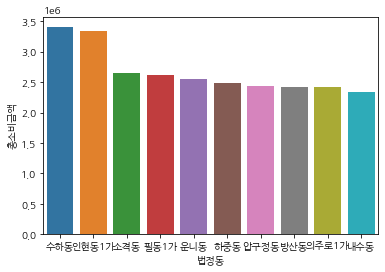

In [ ]:
sns.barplot(data=regionAvgConsump10.iloc[:10,:], x="법정동", y="총소비금액")

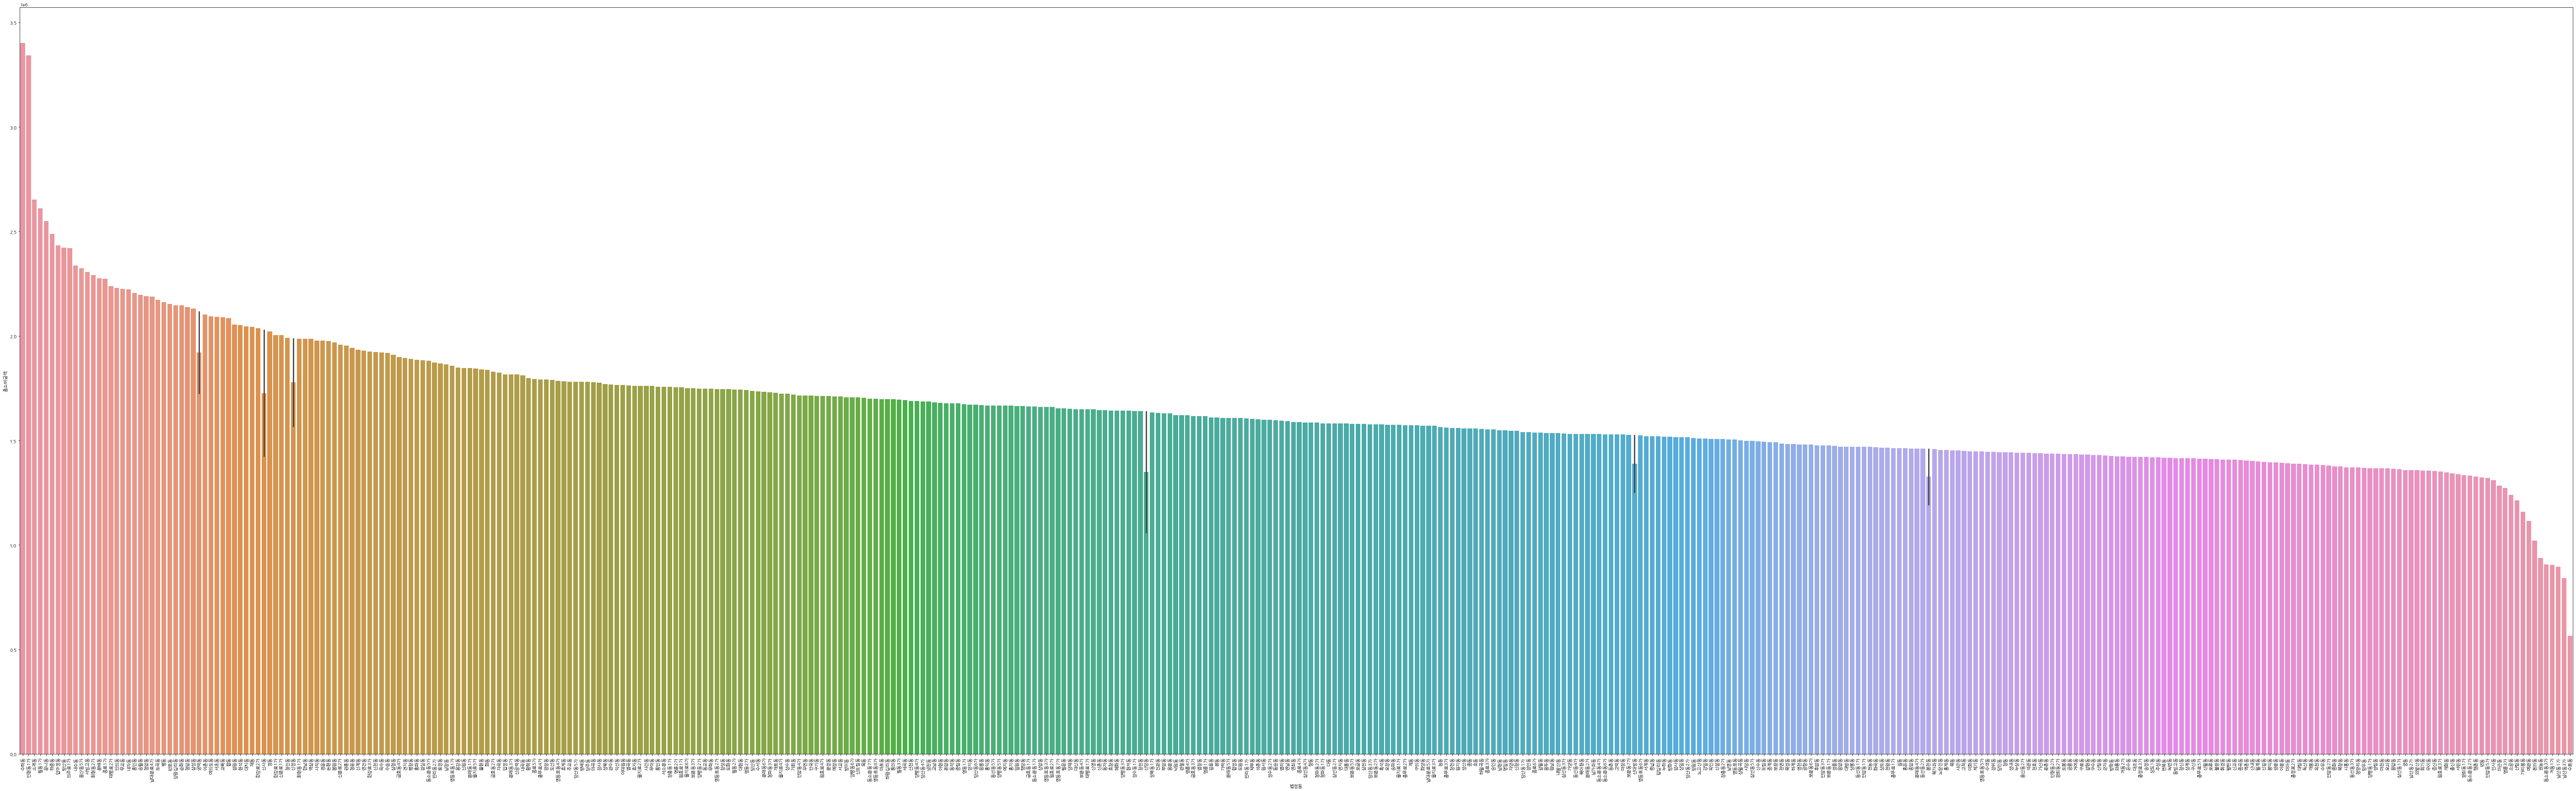

In [ ]:
plt.figure(figsize=(100,30))
plt.xticks(rotation = 90 )
plt.ylabel="소비금액"
sns.barplot(data=regionAvgConsump10, x="법정동", y="총소비금액")

###총수신금액 분석: 은행입장에서 받은 돈 = 수신>> 현금부자들

In [ ]:
edf2=df.loc[:,['지역구', '법정동','총수신금액']]
edf2 = edf2.dropna()

In [ ]:
regionAvgDept = edf2['총수신금액'].groupby([edf2['지역구'],edf2['법정동']]).mean()

In [ ]:
rank_regionAvgDept=pd.DataFrame(regionAvgDept.rank(ascending=False).astype(int))
rank_regionAvgDept
rank_regionAvgDept.sort_values(by='총수신금액')

,,총수신금액
지역구,법정동,
마포구,하중동,1
중구,회현동3가,2
용산구,용산동5가,3
강남구,압구정동,4
용산구,청암동,5
...,...,...
종로구,돈의동,455
중구,봉래동1가,456
강서구,과해동,457


In [ ]:
regionAvgDept=pd.DataFrame(regionAvgDept)

In [ ]:
regionAvgDept.to_csv("regionAvgDept.csv")

In [ ]:
ccc=pd.read_csv("regionAvgDept.csv")

In [ ]:
regionAvgDept=ccc.iloc[:,1:3]

In [ ]:
regionAvgDept10 = regionAvgDept.sort_values(by='총수신금액',ascending=False)

In [ ]:
regionAvgDept10.iloc[:10,:]

,법정동,총수신금액
115,하중동,1.207726e+07
451,회현동3가,1.101388e+07
271,용산동5가,1.086867e+07
8,압구정동,9.765039e+06
279,청암동,9.391041e+06
397,명동1가,9.319152e+06
444,태평로2가,8.947323e+06
335,송월동,8.718294e+06
3,도곡동,8.686929e+06
314,내수동,8.509868e+06


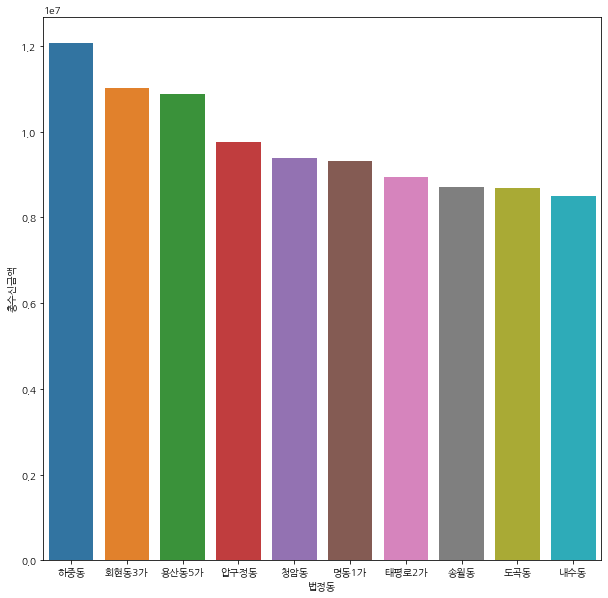

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=regionAvgDept10 .iloc[:10,:], x="법정동", y="총수신금액")

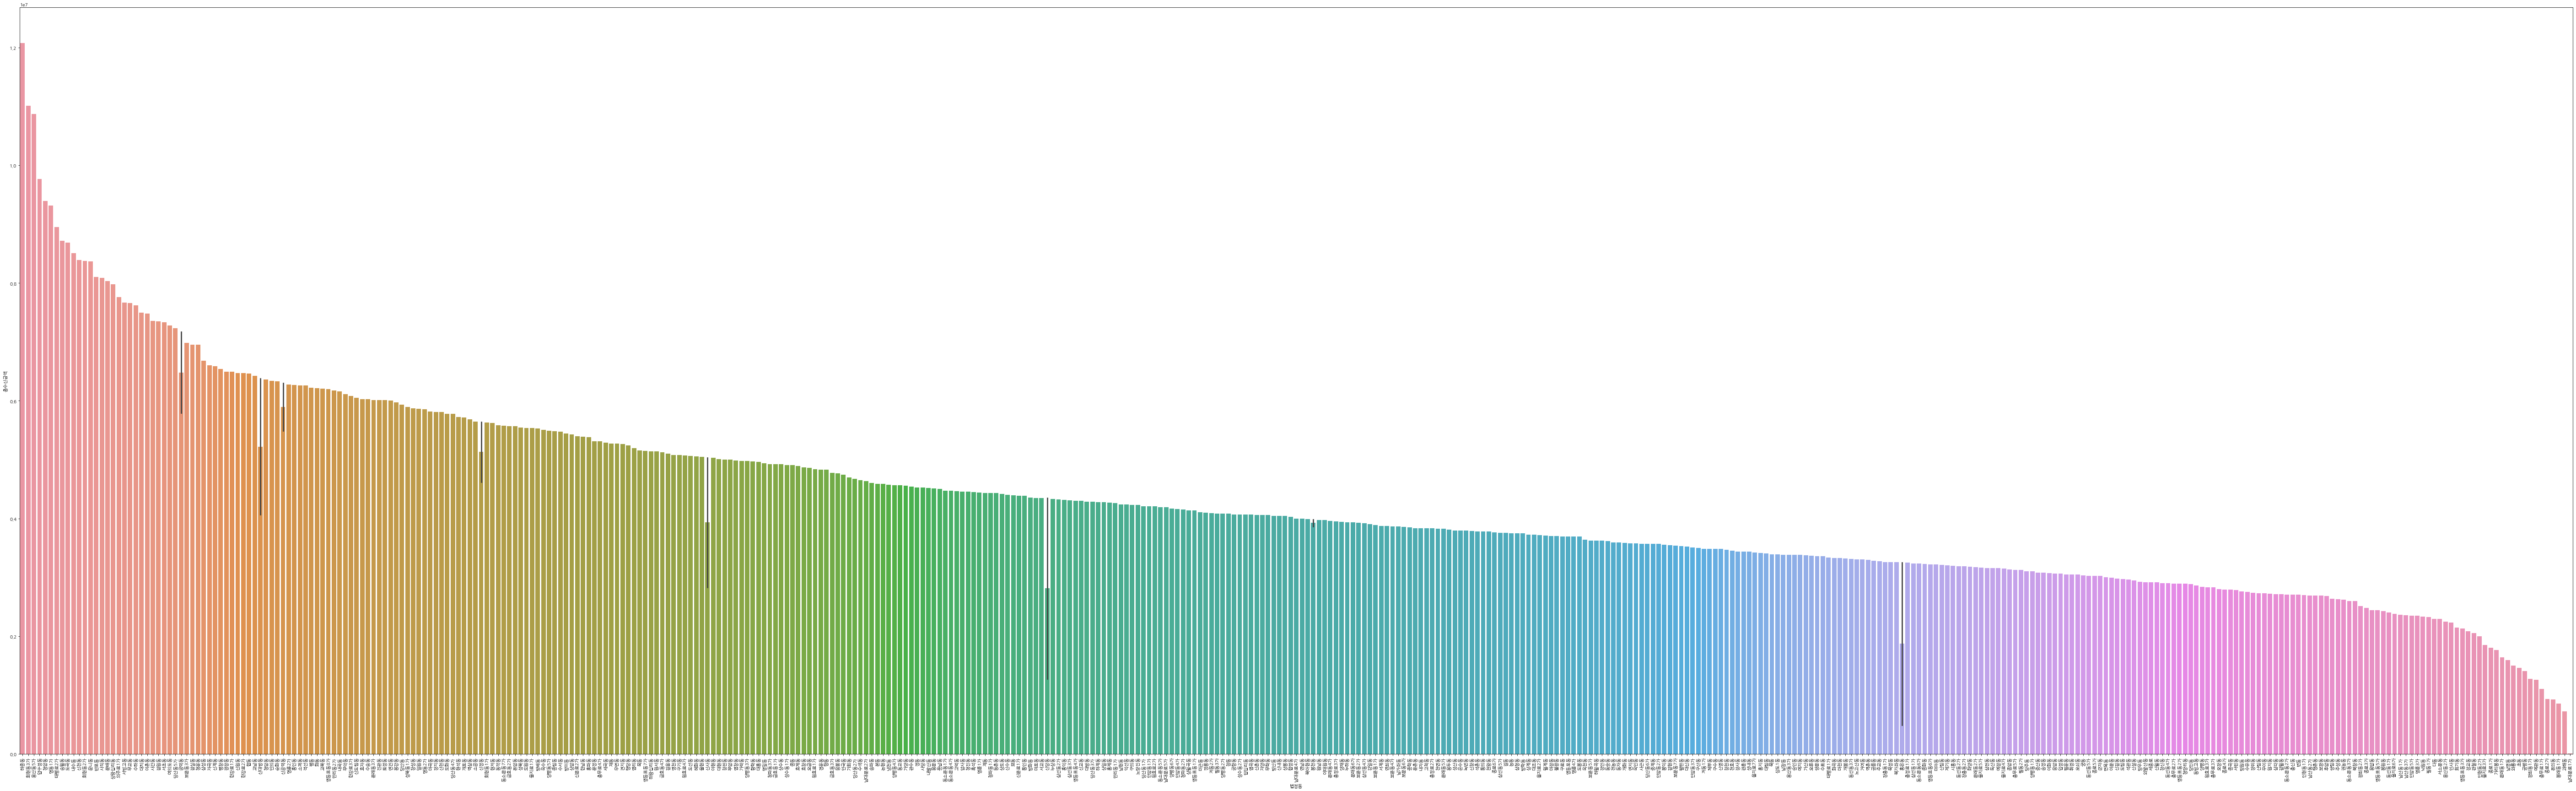

In [ ]:
plt.figure(figsize=(100,30))
plt.xticks(rotation = 90 )
plt.ylabel="소비금액"
sns.barplot(data=regionAvgDept10, x="법정동", y="총수신금액")

###자지금부터는 주택대출금액, 전세자금대출금액을 분석해 봅시다

In [ ]:
edf3 = df.loc[:,['지역구','법정동','주택대출금액']]

In [ ]:
edf33 = df.loc[:,['지역구','법정동','주택대출금액','전세자금대출금액']]

In [ ]:
edf3=edf3.dropna()

In [ ]:
Hdebt = edf3['주택대출금액'].groupby([edf3['지역구'],edf3['법정동']]).mean()

In [ ]:
Hdebt2 = edf33[['주택대출금액','전세자금대출금액']].groupby([edf33['지역구'],edf33['법정동']]).mean()

In [ ]:
Hdebt

지역구  법정동
강남구  개포동    1.613835e+08
     논현동    2.307058e+08
     대치동    2.185327e+08
     도곡동    2.709969e+08
     삼성동    2.322345e+08
                ...     
중랑구  망우동    1.222925e+08
     면목동    1.241858e+08
     상봉동    1.498765e+08
     신내동    7.893113e+07
     중화동    4.808535e+07
Name: 주택대출금액, Length: 107, dtype: float64

In [ ]:
rank_Hdebt=pd.DataFrame(Hdebt.rank(ascending=False).astype(int))
rank_Hdebt
rank_Hdebt.sort_values(by='주택대출금액')

,,주택대출금액
지역구,법정동,
마포구,신수동,1
송파구,잠실동,2
영등포구,당산동5가,3
용산구,이촌동,4
마포구,합정동,5
...,...,...
강서구,등촌동,103
도봉구,방학동,104
노원구,월계동,105


In [ ]:
Hdebt=pd.DataFrame(Hdebt)

In [ ]:
Hdebt.to_csv("Hdebt.csv")

In [ ]:
ddd=pd.read_csv("Hdebt.csv")

In [ ]:
Hdebt=ddd.iloc[:,1:3]

In [ ]:
Hdebt10 = Hdebt.sort_values(by='주택대출금액',ascending=False)

In [ ]:
Hdebt10.iloc[:10,:]

,법정동,주택대출금액
52,신수동,3.362554e+08
79,잠실동,3.235347e+08
84,당산동5가,3.215818e+08
88,이촌동,3.166226e+08
57,합정동,2.795925e+08
64,잠원동,2.792593e+08
61,반포동,2.754683e+08
3,도곡동,2.709969e+08
7,일원동,2.705971e+08
8,청담동,2.655874e+08


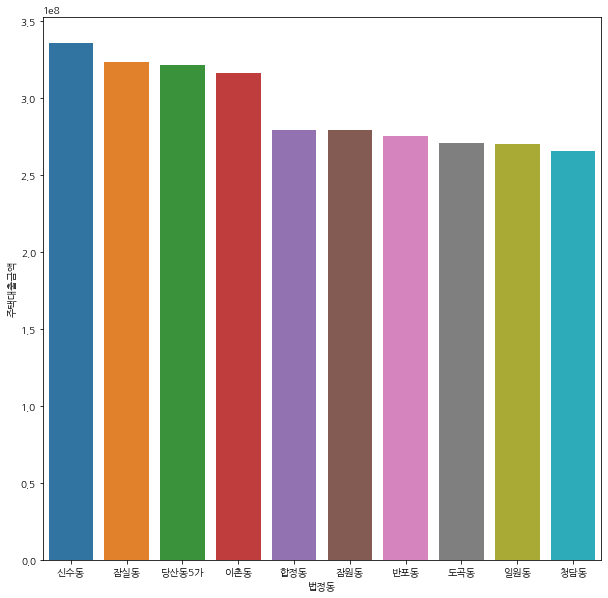

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data= Hdebt10.iloc[:10,:], x="법정동", y="주택대출금액")

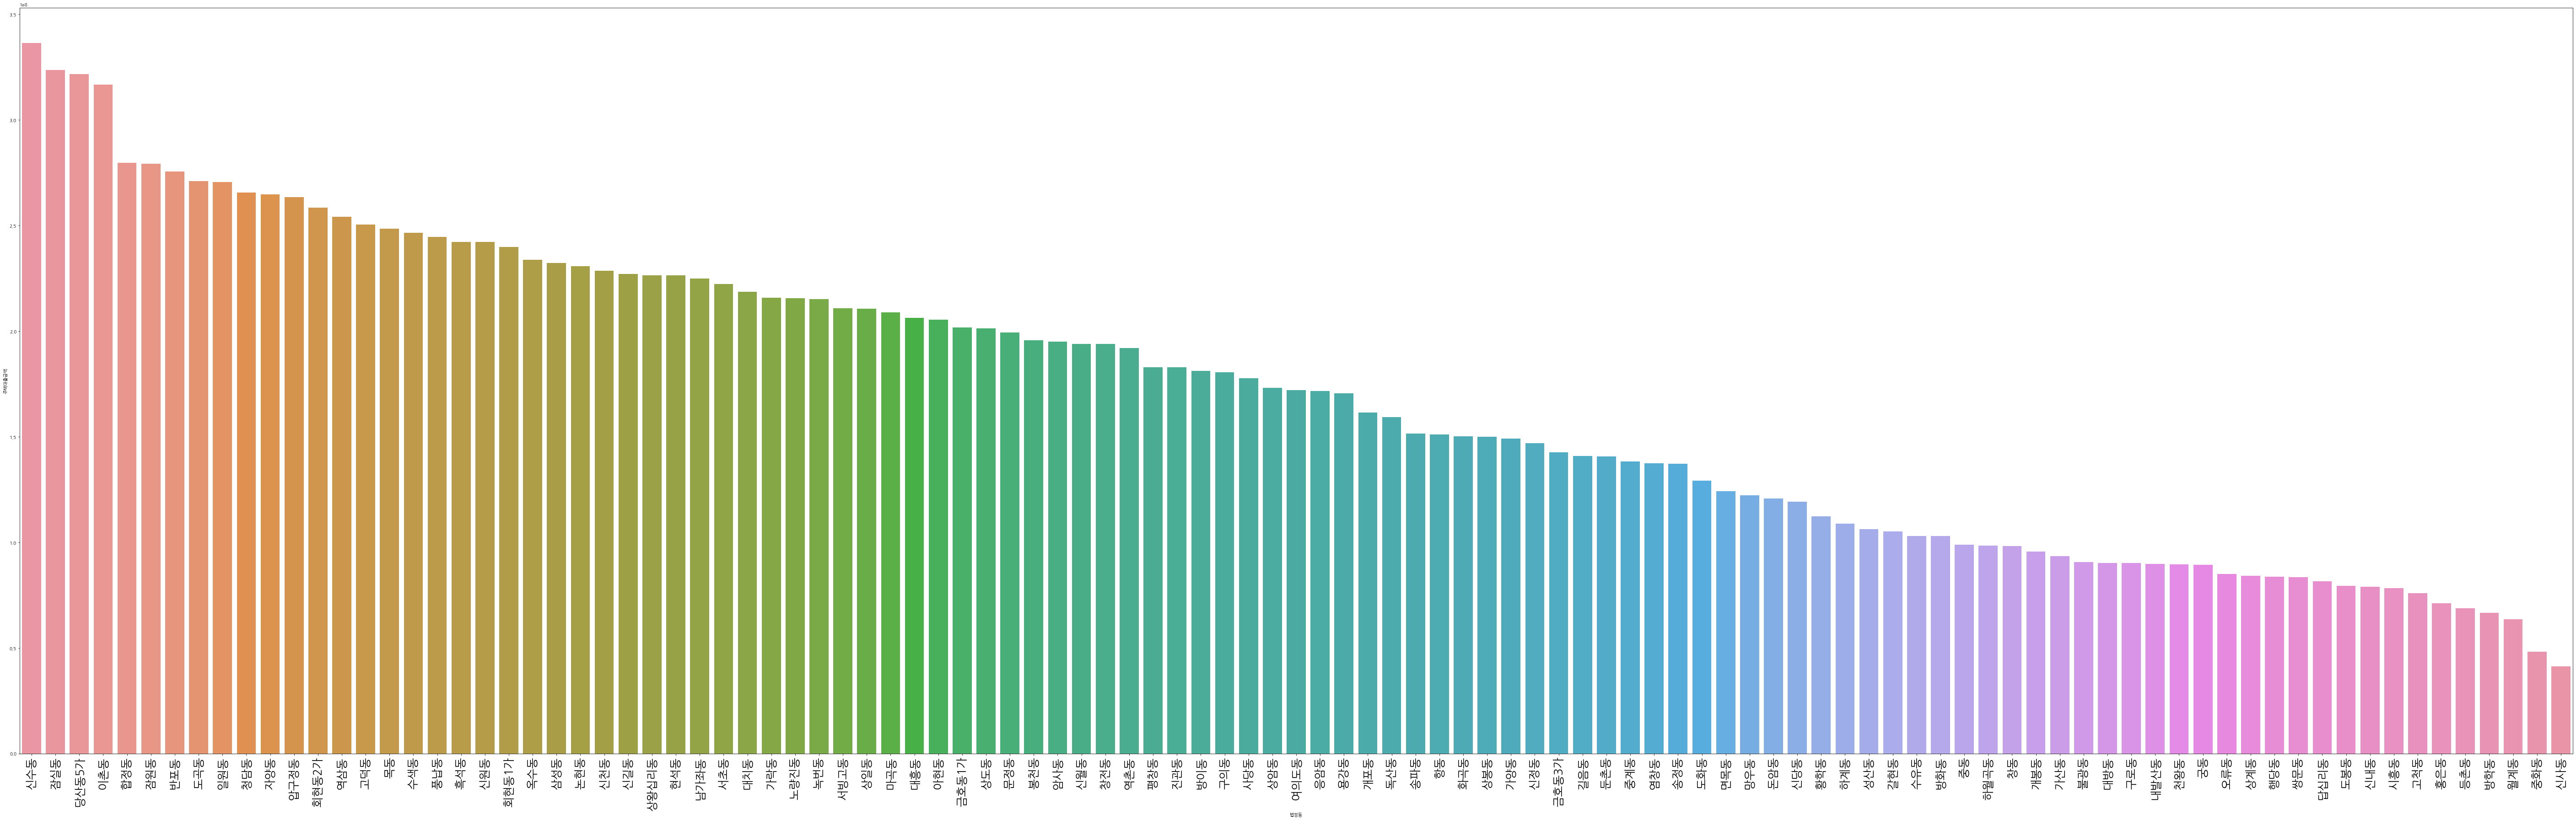

In [ ]:
plt.figure(figsize=(100,30))
plt.xticks(rotation = 90, fontsize=25)

sns.barplot(data=Hdebt10, x="법정동", y="주택대출금액")

##전세자금대출 분석

In [ ]:
edf4 = df.loc[:,['지역구','법정동','전세자금대출금액']]

In [ ]:
edf4=edf4.dropna()

In [ ]:
HLdebt = edf4['전세자금대출금액'].groupby([edf4['지역구'],edf4['법정동']]).mean()

In [ ]:
HLdebt

지역구  법정동
강남구  개포동    1.192819e+08
     논현동    1.142504e+08
     대치동    1.374535e+08
     도곡동    1.220167e+08
     삼성동    7.864872e+07
                ...     
중구   황학동    1.312767e+08
중랑구  면목동    9.961975e+07
     묵동     1.026857e+08
     상봉동    9.595150e+07
     신내동    3.871602e+07
Name: 전세자금대출금액, Length: 166, dtype: float64

In [ ]:
rank_HLdebt=pd.DataFrame(HLdebt.rank(ascending=False).astype(int))
rank_HLdebt
rank_HLdebt.sort_values(by='전세자금대출금액')

전세자금대출금액
지역구 법정동            
노원구 하계동           1
용산구 한남동           2
송파구 풍납동           3
마포구 대흥동           4
중구  만리동2가         5
...             ...
강북구 수유동         162
    번동          163
중랑구 신내동         164
구로구 항동          165
    천왕동         166

[166 rows x 1 columns]

In [ ]:
HLdebt=pd.DataFrame(HLdebt)

In [ ]:
HLdebt.to_csv("HLdebt.csv")

In [ ]:
eee=pd.read_csv("HLdebt.csv")

In [ ]:
HLdebt=eee.iloc[:,1:3]

In [ ]:
HLdebt10 = HLdebt.sort_values(by='전세자금대출금액',ascending=False)

In [ ]:
HLdebt10.iloc[:10,:]

,법정동,전세자금대출금액
51,하계동,2.328000e+08
147,한남동,1.965095e+08
108,풍납동,1.870190e+08
65,대흥동,1.852696e+08
158,만리동2가,1.843789e+08
151,역촌동,1.767065e+08
159,순화동,1.757676e+08
76,남가좌동,1.754370e+08
124,양평동1가,1.751429e+08
74,용강동,1.711241e+08


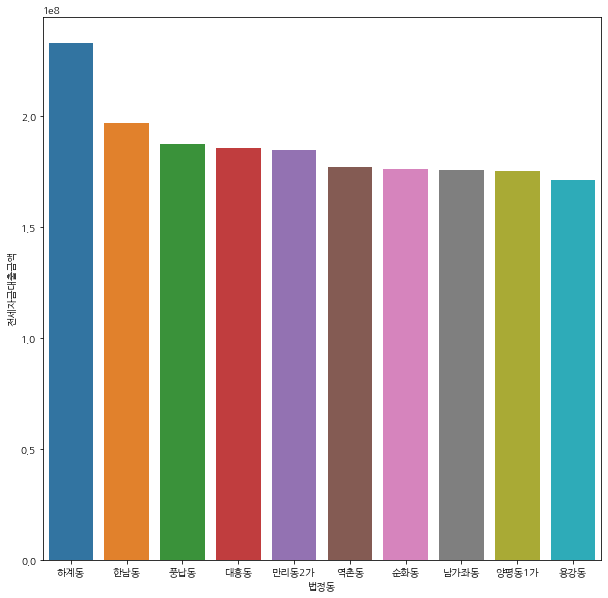

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data= HLdebt10.iloc[:10,:], x="법정동", y="전세자금대출금액")

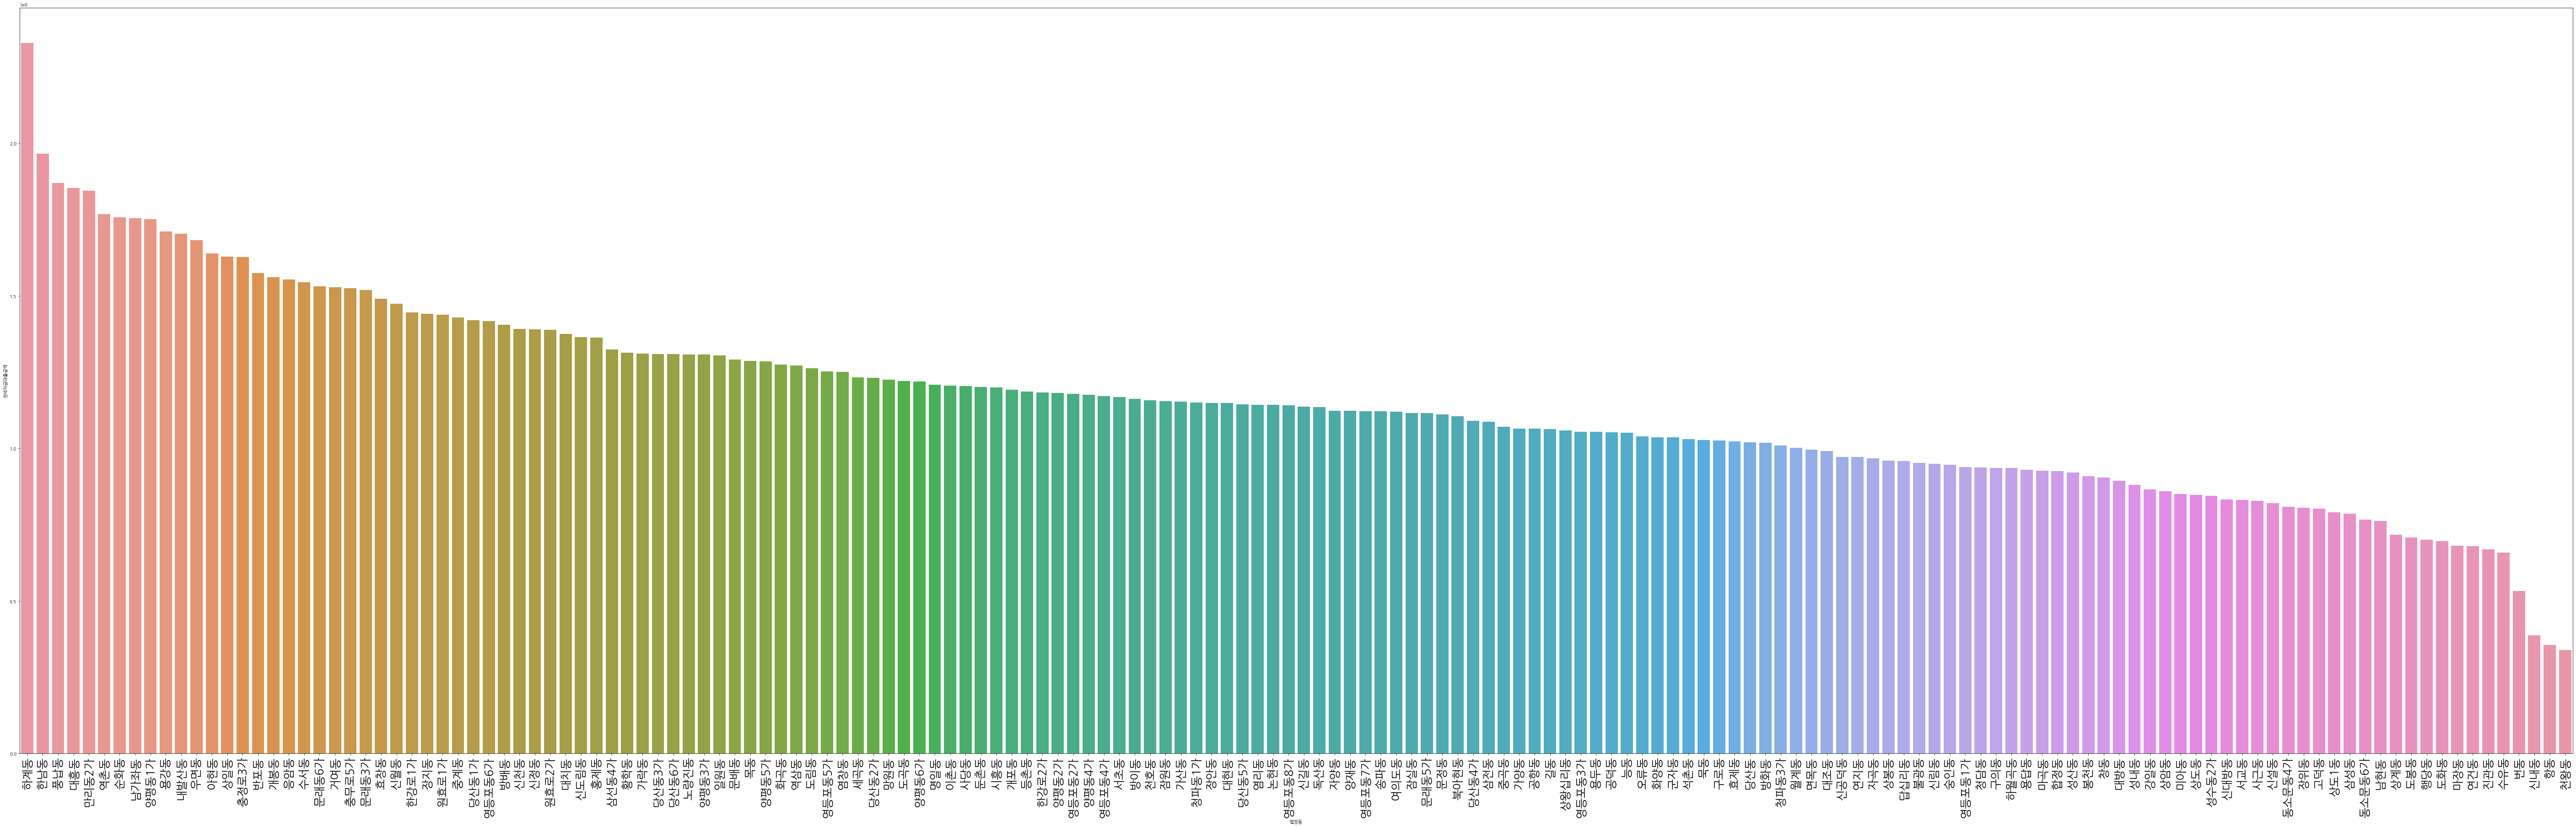

In [ ]:
plt.figure(figsize=(100,30))
plt.xticks(rotation = 90, fontsize=25)

sns.barplot(data=HLdebt10, x="법정동", y="전세자금대출금액")

###2020년 전후로 자산가격이 급등했을 때 소비 지출의 규모 분석 and 소비 품목의 종류 분석(이것은 카드 데이터로 해야지)

In [ ]:
edf5 = df.loc[:,['기준년월','지역구','총소비금액']]

In [ ]:
edf5.dropna()

,기준년월,지역구,총소비금액
0,201903,강남구,2018319.0
1,201903,강남구,2326837.0
2,201903,강남구,1771639.0
3,201903,강남구,1745601.0
4,201903,강남구,1712433.0
...,...,...,...
211881,202103,중랑구,1425069.0
211882,202103,중랑구,2015000.0
211883,202103,중랑구,1495569.0
211884,202103,중랑구,812073.0


In [ ]:
Tconsum = edf5['총소비금액'].groupby([edf5['기준년월'],edf5['지역구']]).sum()

In [ ]:
Tconsum

기준년월    지역구
201903  강남구    1.662631e+10
        강동구    9.915572e+09
        강북구    6.551954e+09
        강서구    1.434629e+10
        관악구    1.167842e+10
                   ...     
202103  용산구    7.584355e+09
        은평구    1.232408e+10
        종로구    4.491112e+09
        중구     4.155110e+09
        중랑구    1.034424e+10
Name: 총소비금액, Length: 125, dtype: float64

In [ ]:
# # rank_Tconsum=pd.DataFrame(Tconsum[201903].rank(ascending=False).astype(int))
# rank_Tconsum
# rank_Tconsum.sort_values(by='총소비금액')
qq=pd.DataFrame(Tconsum[201903]).sort_values(by='총소비금액', ascending=False)

In [ ]:
# rank_Tconsum2=pd.DataFrame(Tconsum[202103].rank(ascending=False).astype(int))
# rank_Tconsum2
# rank_Tconsum2.sort_values(by='총소비금액')
ww=pd.DataFrame(Tconsum[202103]).sort_values(by='총소비금액', ascending=False)

In [ ]:
pd.merge(qq,ww,on='지역구')

,총소비금액_x,총소비금액_y
지역구,,
송파구,1.723870e+10,1.910663e+10
강남구,1.662631e+10,1.898144e+10
강서구,1.434629e+10,1.618120e+10
서초구,1.330727e+10,1.505087e+10
노원구,1.173242e+10,1.274101e+10
관악구,1.167842e+10,1.308968e+10
은평구,1.109409e+10,1.232408e+10
양천구,1.068459e+10,1.175161e+10
동작구,1.014232e+10,1.117597e+10


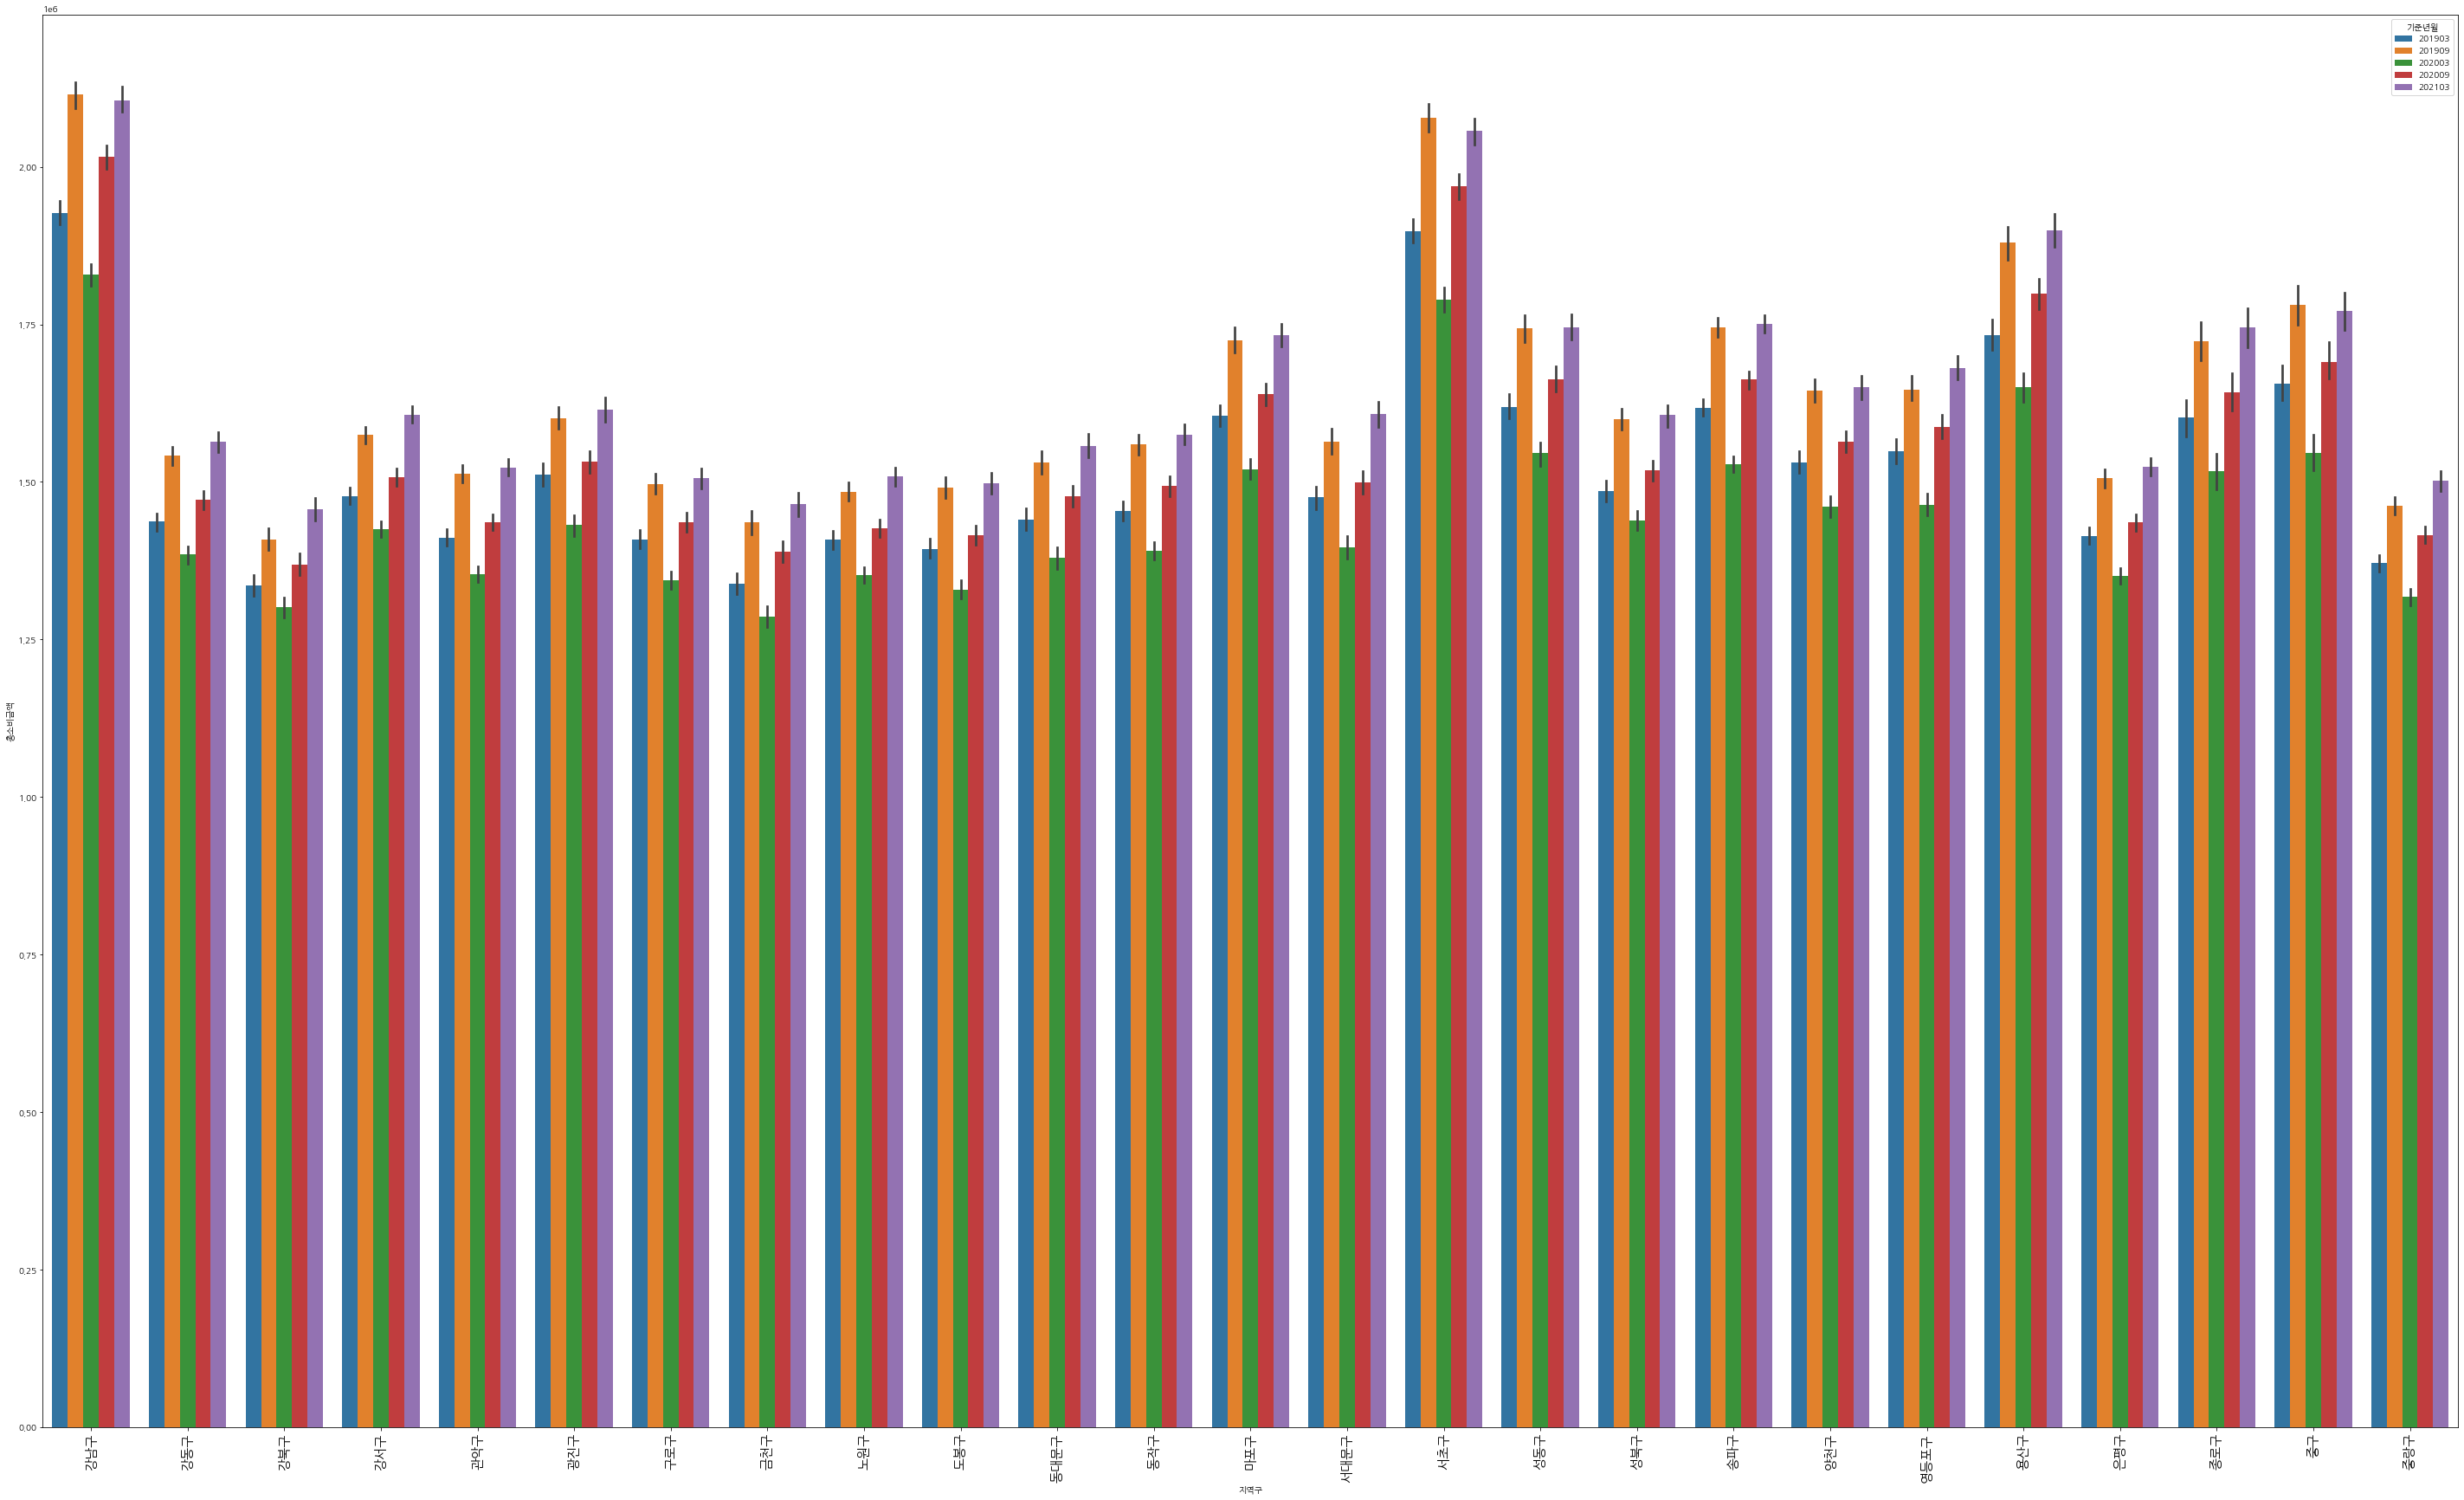

In [ ]:
plt.figure(figsize=(50,30))
plt.xticks(rotation=90, fontsize=15)
sns.barplot(x='지역구',y='총소비금액', hue='기준년월',data=df)